In [2]:
import scienceplots
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
plt.style.use(['science','notebook','grid'])

The SSH Model comprises of lattice sites, having alternate hopping amplitudes: $t$ and $t'$. The Hamiltonian can be written as:
$$\hat{H}_{\text{SSH}}= \sum_{x=0}^N t'\left ( \hat{c}_{x,A}^{\dagger}\hat{c}_{x,B} + \hat{c}_{x,B}^{\dagger}\hat{c}_{x,A}\right )+t\left ( \hat{c}_{x,B}^{\dagger}\hat{c}_{x+1,A} + \hat{c}_{x+1,A}^{\dagger}\hat{c}_{x,B}\right )$$
where,\
t : intercellular hopping amplitude\
t' : intracellular hopping amplitude

\
The Hamiltonian Matrix assumes a tridiagonal form with respect to the basis of the creating and annihilation operators.
$$\displaystyle H_{SSH} =\ \begin{bmatrix}
0 & t' &  &  &  &  &  & \\
t' & 0 & t &  &  &  \text{\Huge0}&  & \\
 & t & 0 & t' &  &  &  & \\
 &  & t' & 0 & t &  &  & \\
 &  &  & t & 0 & t' &  & \\
 &  &  &  & t' & 0 & t & \\
 &  \text{\Huge0} &  &  &  & t & \ddots  & \\
 &  &  &  &  &  &  & 0
\end{bmatrix}$$

In [3]:
#definining the Hamiltonian Matrix for SSH Model
def Ham_SSH(t,t1):
    A=np.zeros((30,30))
    A[0][1]=t1
    for i in range(1,29):
        if(i%2!=0):
            A[i][i-1]=t1
            A[i][i+1]=t
        else:
            A[i][i-1]=t
            A[i][i+1]=t1
    A[29][28]=t1
    return A




Text(0.5, 1.0, "t>t'")

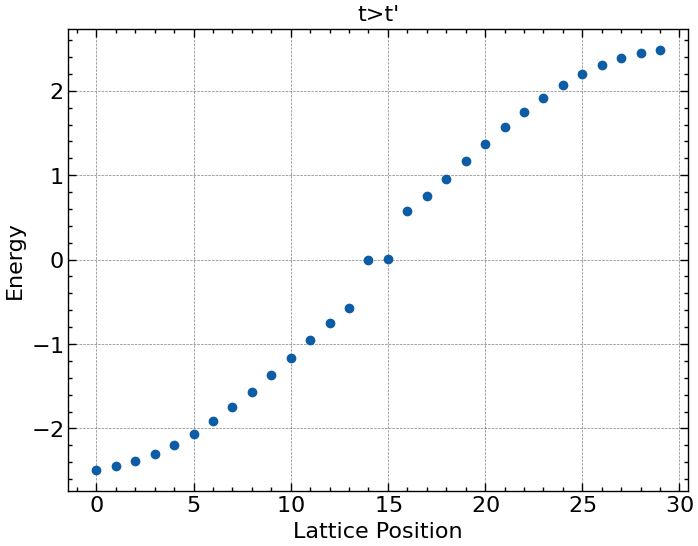

In [4]:
#Calculating the energy eigenvalues when t>t'
p,q=eig(Ham_SSH(1.5,1))
p.sort()
L=np.arange(30)
plt.scatter(L,p)
plt.ylabel("Energy")
plt.xlabel("Lattice Position")
plt.title("t>t'")

Text(0.5, 1.0, "t<t'")

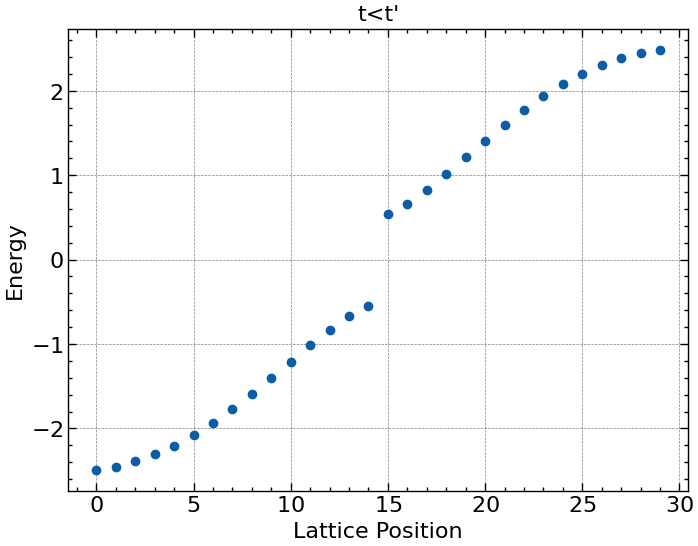

In [5]:
#Calculating the energy eigenvalues when t<t'
p1,q1=eig(Ham_SSH(1,1.5))
p1.sort()
L=np.arange(30)
plt.scatter(L,p1)
plt.ylabel("Energy")
plt.xlabel("Lattice Position")
plt.title("t<t'")

Text(0.5, 1.0, "t=t'")

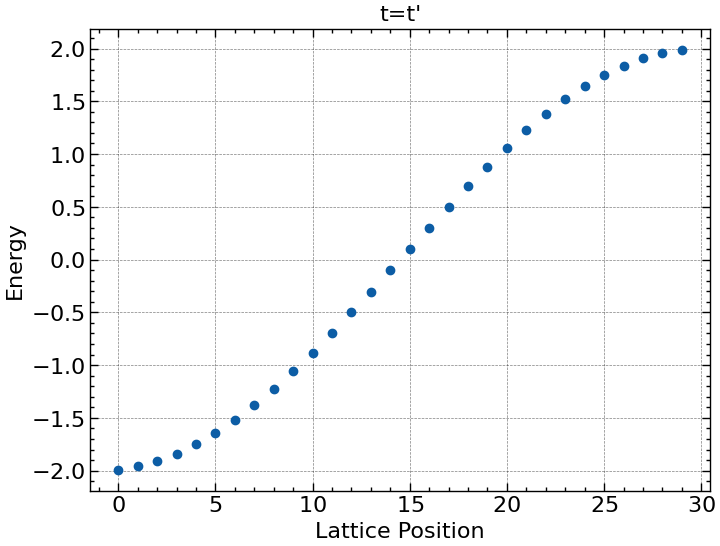

In [6]:
#Calculating the energy eigenvalues when t=t'
p2,q2=eig(Ham_SSH(1,1))
p2.sort()
L=np.arange(30)
plt.scatter(L,p2)
plt.ylabel("Energy")
plt.xlabel("Lattice Position")
plt.title("t=t'")

In [77]:
#Calculating the eigenvalues by varying t', keeping t=1
t=np.linspace(0,2,20)
i=0
EV=[]
while i<2:
    pn,qn=eig(Ham_SSH(1,i))
    pn.sort()
    EV.append(pn)
    i+=0.1



Text(0, 0.5, 'Energy')

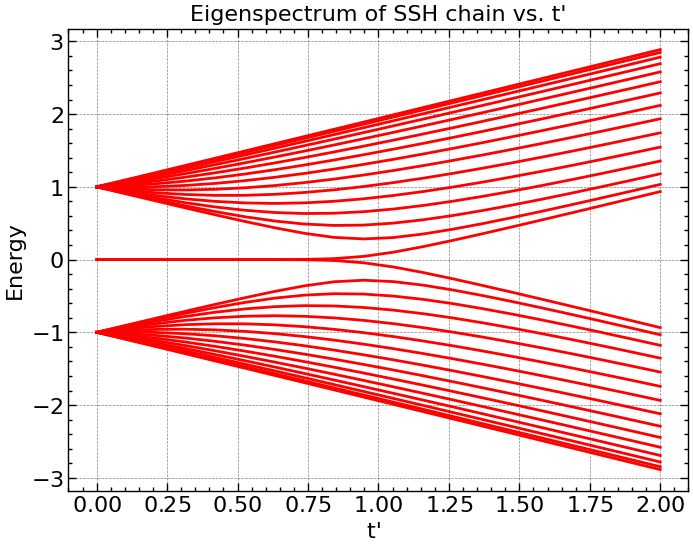

In [85]:

#Plotting the eigenspectrum of the SSH model, varying with t'
for j in range(30):
       k=[]
       for i in range(20):
              k.append(EV[i][j])
       plt.plot(t,k, 'red')
plt.title("Eigenspectrum of SSH chain vs. t'")
plt.xlabel("t' ")
plt.ylabel("Energy")
